In [ ]:
# Este programa é software livre: você pode redistribuí-lo e/ou modificá-lo sob os 
# termos da Licença Pública Geral GNU conforme publicada pela Free Software Foundation, 
# na versão 3 da licença, ou qualquer versão posterior.
#
# Este programa é distribuído na esperança de que seja útil, 
# mas SEM NENHUMA GARANTIA; sem mesmo a garantia implícita de 
# COMERCIALIZAÇÃO ou ADEQUAÇÃO A UM DETERMINADO FIM. 
# Consulte a Licença Pública Geral GNU para mais detalhes.
#
# Você deve ter recebido uma cópia da Licença Pública Geral GNU 
# junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.
#
# Copyright (C) 2025 Gustavo Rodrigues Bassaco

Inicialização dos Conjuntos e variáveis

In [3]:
# Conjuntos
M = {1, 2, 3, 4}          # tanque/linha
J = {1, 2, 3, 4, 5, 6}    # 1 item fantasmas e 5 itens

Tp = 1.667      # 1000  # tempo de produção em minutos (mistura/preparo) de um lote de bebida no tanque
Cap = 168       # 1440  # capacidade total disponível em tempo do tanque preparatório/linha m no período t.
LT_I = 0.83     # tempo de realização de uma limpeza temporal no tanque preparatório.
LT_II = 5       # tempo de realização de uma limpeza temporal na linha.TP_max = 24   # tempo máximo permitido sem limpeza temporal desde a realização da última limpeza no tanque preparatório, durante a produção de um mesmo sabor.
TL_max = 48     # tempo máximo permitido sem limpeza temporal desde a realização da última limpeza na linha, durante a produção de um mesmo sabor.
TP_max = 24     # tempo máximo permitido sem limpeza temporal desde a realização da última limpeza no tanque preparatório, durante a produção de um mesmo sabor.
h_plus = 1      # custo de estoque de uma unidade do item j.
h_minus = 10    # custo de atraso de uma unidade do item j.
Clt = 1         # custo de uma limpeza temporal no tanque preparatório e na linha
rho = 2.4       # quantidade de bebida para produzir uma unidade de um item j
S = {1: 2260, 2: 2260, 3: 2260, 4: 2260} # velocidade de envase da linha m em litros por hora.

# lote minimo
LB = {
    1: 99999999,    # item fantasma
    2: 3000,        # laranja
    3: 6000,        # maracuja
    4: 6000,        # abacaxi
    5: 5000,        # uva
    6: 4000,        # morango
    }    

#lote maximo
UB = {
    1: 99999999,    # item fantasma
    2: 12000,        # laranja
    3: 12000,        # maracuja
    4: 12000,        # abacaxi
    5: 10000,        # uva
    6: 12000,        # morango
    }

C = {  #f  l  m  a  u  m   penalização da troca do item i para o item j.
    1: [0, 1, 1, 1, 1, 1], # f 
    2: [0, 0, 2, 2, 2, 2], # l
    3: [0, 2, 0, 2, 2, 2], # m
    4: [0, 2, 2, 0, 2, 2], # a
    5: [0, 4, 4, 4, 0, 3], # u
    6: [0, 3, 3, 3, 3, 0]  # m
    }  


TC_I  = {  #f  l  m  a  u  m   tempo de troca.
    1: [0, 1, 1, 1, 1, 1], # f 
    2: [0, 0, 1, 1, 1, 1], # l
    3: [0, 1, 0, 1, 1, 1], # m
    4: [0, 1, 1, 0, 1, 1], # a
    5: [0, 3, 3, 3, 0, 2], # u
    6: [0, 2, 2, 2, 2, 0]  # m
    }  

TC_II ={#f  l  m  a  u  m   tempo de troca.
    1: [0, 1, 1, 1, 1, 1], # f 
    2: [0, 0, 1, 1, 1, 1], # l
    3: [0, 1, 0, 1, 1, 1], # m
    4: [0, 1, 1, 0, 1, 1], # a
    5: [0, 3, 3, 3, 0, 2], # u
    6: [0, 2, 2, 2, 2, 0]  # m
    } 

Mgde = 194 # número suficientemente grande (em geral, utilizado como 15% maior do que Capmt ).


Demanda com horizonte de planejamento de 1 mês

In [ ]:
# um mês

T = {1, 2, 3, 4}

# lotes maximos (m, t)
O = {(m, t): set(range(1, 40)) for m in range(1, len(M) + 1) for t in range(1, len(T) + 1)}


d = [
    {   # muito baixa
    1: [0,             0,             0,             0            ], 
    2: [30_000  *0.5,    16_000   *0.5,   50_000   *0.5,   40_000   *0.5  ], 
    3: [85_000  *0.5,    30_000   *0.5,   4_000    *0.5,   100_000  *0.5  ], 
    4: [70_000  *0.5,    60_000   *0.5,   55_000   *0.5,   74_000   *0.5  ],
    5: [110_000 *0.5,    24_000   *0.5,   30_000   *0.5,   20_000   *0.5  ],
    6: [40_000  *0.5,    100_000  *0.5,   80_000   *0.5,   65_000   *0.5  ],
    },
    {   # baixa
    1: [0,             0,             0,             0            ], 
    2: [30_000  *0.75,    16_000   *0.75,   50_000   *0.75,   40_000   *0.75  ], 
    3: [85_000  *0.75,    30_000   *0.75,   4_000    *0.75,   100_000  *0.75  ], 
    4: [70_000  *0.75,    60_000   *0.75,   55_000   *0.75,   74_000   *0.75  ],
    5: [110_000 *0.75,    24_000   *0.75,   30_000   *0.75,   20_000   *0.75  ],
    6: [40_000  *0.75,    100_000  *0.75,   80_000   *0.75,   65_000   *0.75  ],
    },
    {   # media
    1: [0,             0,             0,             0            ], 
    2: [30_000  *1,    16_000   *1,   50_000   *1,   40_000   *1  ], 
    3: [85_000  *1,    30_000   *1,   4_000    *1,   100_000  *1  ], 
    4: [70_000  *1,    60_000   *1,   55_000   *1,   74_000   *1  ],
    5: [110_000 *1,    24_000   *1,   30_000   *1,   20_000   *1  ],
    6: [40_000  *1,    100_000  *1,   80_000   *1,   65_000   *1  ],
    },
    {   # alta
    1: [0,             0,             0,             0            ], 
    2: [30_000  *1.25,    16_000   *1.25,   50_000   *1.25,   40_000   *1.25  ], 
    3: [85_000  *1.25,    30_000   *1.25,   4_000    *1.25,   100_000  *1.25  ], 
    4: [70_000  *1.25,    60_000   *1.25,   55_000   *1.25,   74_000   *1.25  ],
    5: [110_000 *1.25,    24_000   *1.25,   30_000   *1.25,   20_000   *1.25  ],
    6: [40_000  *1.25,    100_000  *1.25,   80_000   *1.25,   65_000   *1.25  ],
    }, 
    {   # muito alta
    1: [0,             0,             0,             0            ], 
    2: [30_000  *1.4,    16_000   *1.4,   50_000   *1.4,   40_000   *1.4  ], 
    3: [85_000  *1.4,    30_000   *1.4,   4_000    *1.4,   100_000  *1.4  ], 
    4: [70_000  *1.4,    60_000   *1.4,   55_000   *1.4,   74_000   *1.4  ],
    5: [110_000 *1.4,    24_000   *1.4,   30_000   *1.4,   20_000   *1.4  ],
    6: [40_000  *1.4,    100_000  *1.4,   80_000   *1.4,   65_000   *1.4  ],
    },       
    ] 

Demanda com horizonte de planejamento de 2 meses

In [4]:
# dois meses

T = {1, 2, 3, 4, 5, 6, 7, 8}

# lotes maximos (m, t)
O = {(m, t): set(range(1, 40)) for m in range(1, len(M) + 1) for t in range(1, len(T) + 1)}


d = [
    {   # muito baixa
    1: [0,        0,        0,        0,        0,       0,        0,        0      ], 
    2: [30_000   *0.5,  16_000   *0.5,   50_000  *0.5,   40_000    *0.5,    85_000  *0.5,  30_000   *0.5,   4_000   *0.5,   120_000  *0.5], 
    3: [85_000   *0.5,  30_000   *0.5,   4_000   *0.5,   100_000   *0.5,    40_000  *0.5,  100_000  *0.5,   80_000  *0.5,   65_000   *0.5], 
    4: [70_000   *0.5,  60_000   *0.5,   55_000  *0.5,   74_000    *0.5,    30_000  *0.5,  16_000   *0.5,   50_000  *0.5,   40_000   *0.5],
    5: [110_000  *0.5,  24_000   *0.5,   30_000  *0.5,   20_000    *0.5,    85_000  *0.5,  30_000   *0.5,   77_000  *0.5,   100_000  *0.5],
    6: [40_000   *0.5,  100_000  *0.5,   80_000  *0.5,   65_000    *0.5,    40_000  *0.5,  100_000  *0.5,   80_000  *0.5,   65_000   *0.5],
    },
    {   # baixa
    1: [0,        0,        0,        0,        0,       0,        0,        0      ], 
    2: [30_000   *0.75,  16_000   *0.75,   50_000  *0.75,   40_000    *0.75,    85_000  *0.75,  30_000   *0.75,   4_000   *0.75,   120_000  *0.75], 
    3: [85_000   *0.75,  30_000   *0.75,   4_000   *0.75,   100_000   *0.75,    40_000  *0.75,  100_000  *0.75,   80_000  *0.75,   65_000   *0.75], 
    4: [70_000   *0.75,  60_000   *0.75,   55_000  *0.75,   74_000    *0.75,    30_000  *0.75,  16_000   *0.75,   50_000  *0.75,   40_000   *0.75],
    5: [110_000  *0.75,  24_000   *0.75,   30_000  *0.75,   20_000    *0.75,    85_000  *0.75,  30_000   *0.75,   77_000  *0.75,   100_000  *0.75],
    6: [40_000   *0.75,  100_000  *0.75,   80_000  *0.75,   65_000    *0.75,    40_000  *0.75,  100_000  *0.75,   80_000  *0.75,   65_000   *0.75],
    },
    {   # media
    1: [0,        0,        0,        0,        0,       0,        0,        0      ], 
    2: [30_000   *1,  16_000   *1,   50_000  *1,   40_000    *1,    85_000  *1,  30_000   *1,   4_000   *1,   120_000  *1], 
    3: [85_000   *1,  30_000   *1,   4_000   *1,   100_000   *1,    40_000  *1,  100_000  *1,   80_000  *1,   65_000   *1], 
    4: [70_000   *1,  60_000   *1,   55_000  *1,   74_000    *1,    30_000  *1,  16_000   *1,   50_000  *1,   40_000   *1],
    5: [110_000  *1,  24_000   *1,   30_000  *1,   20_000    *1,    85_000  *1,  30_000   *1,   77_000  *1,   100_000  *1],
    6: [40_000   *1,  100_000  *1,   80_000  *1,   65_000    *1,    40_000  *1,  100_000  *1,   80_000  *1,   65_000   *1],
    },
    {   # alta
    1: [0,        0,        0,        0,        0,       0,        0,        0      ], 
    2: [30_000   *1.25,  16_000   *1.25,   50_000  *1.25,   40_000    *1.25,    85_000  *1.25,  30_000   *1.25,   4_000   *1.25,   120_000  *1.25], 
    3: [85_000   *1.25,  30_000   *1.25,   4_000   *1.25,   100_000   *1.25,    40_000  *1.25,  100_000  *1.25,   80_000  *1.25,   65_000   *1.25], 
    4: [70_000   *1.25,  60_000   *1.25,   55_000  *1.25,   74_000    *1.25,    30_000  *1.25,  16_000   *1.25,   50_000  *1.25,   40_000   *1.25],
    5: [110_000  *1.25,  24_000   *1.25,   30_000  *1.25,   20_000    *1.25,    85_000  *1.25,  30_000   *1.25,   77_000  *1.25,   100_000  *1.25],
    6: [40_000   *1.25,  100_000  *1.25,   80_000  *1.25,   65_000    *1.25,    40_000  *1.25,  100_000  *1.25,   80_000  *1.25,   65_000   *1.25],
    },
    {   # muito alta
    1: [0,        0,        0,        0,        0,       0,        0,        0      ], 
    2: [30_000   *1.5,  16_000   *1.5,   50_000  *1.5,   40_000    *1.5,    85_000  *1.5,  30_000   *1.5,   4_000   *1.5,   120_000  *1.5], 
    3: [85_000   *1.5,  30_000   *1.5,   4_000   *1.5,   100_000   *1.5,    40_000  *1.5,  100_000  *1.5,   80_000  *1.5,   65_000   *1.5], 
    4: [70_000   *1.5,  60_000   *1.5,   55_000  *1.5,   74_000    *1.5,    30_000  *1.5,  16_000   *1.5,   50_000  *1.5,   40_000   *1.5],
    5: [110_000  *1.5,  24_000   *1.5,   30_000  *1.5,   20_000    *1.5,    85_000  *1.5,  30_000   *1.5,   77_000  *1.5,   100_000  *1.5],
    6: [40_000   *1.5,  100_000  *1.5,   80_000  *1.5,   65_000    *1.5,    40_000  *1.5,  100_000  *1.5,   80_000  *1.5,   65_000   *1.5],
    },
    ] 


Demanda com horizonte de planejamento de 3 meses

In [6]:
# tres meses

T = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

# lotes maximos (m, t)
O = {(m, t): set(range(1, 40)) for m in range(1, len(M) + 1) for t in range(1, len(T) + 1)}


d = [
    {  # muito baixa
    1: [0,           0,           0,        0,        0,       0,        0,        0,         0,          0,          0,          0       ], 
    2: [30_000  *0.5,  16_000  *0.5,   50_000  *0.5,   40_000   *0.5,   85_000  *0.5,  30_000  *0.5,   4_000  *0.5,   120_000 *0.5,   44_000  *0.5,    32_000  *0.5,    76_000  *0.5,     66_000  *0.5  ], 
    3: [85_000  *0.5,  30_000  *0.5,   4_000   *0.5,   100_000  *0.5,   40_000  *0.5,  100_000 *0.5,   80_000 *0.5,   65_000  *0.5,   130_000 *0.5,    60_000  *0.5,    20_000  *0.5,     19_000  *0.5  ], 
    4: [70_000  *0.5,  60_000  *0.5,   55_000  *0.5,   74_000   *0.5,   30_000  *0.5,  16_000  *0.5,   50_000 *0.5,   40_000  *0.5,   43_000  *0.5,    45_000  *0.5,    56_000  *0.5,     70_000  *0.5  ],
    5: [110_000 *0.5,  24_000  *0.5,   30_000  *0.5,   20_000   *0.5,   85_000  *0.5,  30_000  *0.5,   77_000 *0.5,   100_000 *0.5,   80_000  *0.5,    70_000  *0.5,    69_000  *0.5,     48_000  *0.5  ],
    6: [40_000  *0.5,  100_000 *0.5,   80_000  *0.5,   65_000   *0.5,   40_000  *0.5,  100_000 *0.5,   80_000 *0.5,   65_000  *0.5,   50_000  *0.5,    99_000  *0.5,    60_000  *0.5,     104_000 *0.5  ],
    },
    {  # baixa
    1: [0,           0,            0,        0,        0,       0,        0,        0,         0,          0,          0,          0       ], 
    2: [30_000  *0.75,  16_000  *0.75,   50_000  *0.75,   40_000   *0.75,   85_000  *0.75,  30_000  *0.75,   4_000  *0.75,   120_000 *0.75,   44_000  *0.75,    32_000  *0.75,    76_000  *0.75,     66_000  *0.75  ], 
    3: [85_000  *0.75,  30_000  *0.75,   4_000   *0.75,   100_000  *0.75,   40_000  *0.75,  100_000 *0.75,   80_000 *0.75,   65_000  *0.75,   130_000 *0.75,    60_000  *0.75,    20_000  *0.75,     19_000  *0.75  ], 
    4: [70_000  *0.75,  60_000  *0.75,   55_000  *0.75,   74_000   *0.75,   30_000  *0.75,  16_000  *0.75,   50_000 *0.75,   40_000  *0.75,   43_000  *0.75,    45_000  *0.75,    56_000  *0.75,     70_000  *0.75  ],
    5: [110_000 *0.75,  24_000  *0.75,   30_000  *0.75,   20_000   *0.75,   85_000  *0.75,  30_000  *0.75,   77_000 *0.75,   100_000 *0.75,   80_000  *0.75,    70_000  *0.75,    69_000  *0.75,     48_000  *0.75  ],
    6: [40_000  *0.75,  100_000 *0.75,   80_000  *0.75,   65_000   *0.75,   40_000  *0.75,  100_000 *0.75,   80_000 *0.75,   65_000  *0.75,   50_000  *0.75,    99_000  *0.75,    60_000  *0.75,     104_000 *0.75  ],
    },    
    {  # media
    1: [0,           0,            0,        0,        0,       0,        0,        0,         0,          0,          0,          0       ], 
    2: [30_000  *1,  16_000  *1,   50_000  *1,   40_000   *1,   85_000  *1,  30_000  *1,   4_000  *1,   120_000 *1,   44_000  *1,    32_000  *1,    76_000  *1,     66_000  *1  ], 
    3: [85_000  *1,  30_000  *1,   4_000   *1,   100_000  *1,   40_000  *1,  100_000 *1,   80_000 *1,   65_000  *1,   130_000 *1,    60_000  *1,    20_000  *1,     19_000  *1  ], 
    4: [70_000  *1,  60_000  *1,   55_000  *1,   74_000   *1,   30_000  *1,  16_000  *1,   50_000 *1,   40_000  *1,   43_000  *1,    45_000  *1,    56_000  *1,     70_000  *1  ],
    5: [110_000 *1,  24_000  *1,   30_000  *1,   20_000   *1,   85_000  *1,  30_000  *1,   77_000 *1,   100_000 *1,   80_000  *1,    70_000  *1,    69_000  *1,     48_000  *1  ],
    6: [40_000  *1,  100_000 *1,   80_000  *1,   65_000   *1,   40_000  *1,  100_000 *1,   80_000 *1,   65_000  *1,   50_000  *1,    99_000  *1,    60_000  *1,     104_000 *1  ],
    },
    {  # alta
    1: [0,           0,            0,        0,        0,       0,        0,        0,         0,          0,          0,          0       ], 
    2: [30_000  *1.1,  16_000  *1.1,   50_000  *1.1,   40_000   *1.1,   85_000  *1.1,  30_000  *1.1,   4_000  *1.1,   120_000 *1.1,   44_000  *1.1,    32_000  *1.1,    76_000  *1.1,     66_000  *1.1  ], 
    3: [85_000  *1.1,  30_000  *1.1,   4_000   *1.1,   100_000  *1.1,   40_000  *1.1,  100_000 *1.1,   80_000 *1.1,   65_000  *1.1,   130_000 *1.1,    60_000  *1.1,    20_000  *1.1,     19_000  *1.1  ], 
    4: [70_000  *1.1,  60_000  *1.1,   55_000  *1.1,   74_000   *1.1,   30_000  *1.1,  16_000  *1.1,   50_000 *1.1,   40_000  *1.1,   43_000  *1.1,    45_000  *1.1,    56_000  *1.1,     70_000  *1.1  ],
    5: [110_000 *1.1,  24_000  *1.1,   30_000  *1.1,   20_000   *1.1,   85_000  *1.1,  30_000  *1.1,   77_000 *1.1,   100_000 *1.1,   80_000  *1.1,    70_000  *1.1,    69_000  *1.1,     48_000  *1.1  ],
    6: [40_000  *1.1,  100_000 *1.1,   80_000  *1.1,   65_000   *1.1,   40_000  *1.1,  100_000 *1.1,   80_000 *1.1,   65_000  *1.1,   50_000  *1.1,    99_000  *1.1,    60_000  *1.1,     104_000 *1.1  ],
    },
    {  # muito alta
    1: [0,           0,            0,        0,        0,       0,        0,        0,         0,          0,          0,          0       ], 
    2: [30_000  *1.22,  16_000  *1.22,   50_000  *1.22,   40_000   *1.22,   85_000  *1.22,  30_000  *1.22,   4_000  *1.22,   120_000 *1.22,   44_000  *1.22,    32_000  *1.22,    76_000  *1.22,     66_000  *1.22  ], 
    3: [85_000  *1.22,  30_000  *1.22,   4_000   *1.22,   100_000  *1.22,   40_000  *1.22,  70_000 *1.22,   80_000 *1.22,   65_000  *1.22,   100_000 *1.22,    60_000  *1.22,    20_000  *1.22,     19_000  *1.22  ], 
    4: [70_000  *1.22,  60_000  *1.22,   55_000  *1.22,   74_000   *1.22,   30_000  *1.22,  16_000  *1.22,   50_000 *1.22,   40_000  *1.22,   43_000  *1.22,    45_000  *1.22,    56_000  *1.22,     70_000  *1.22  ],
    5: [110_000 *1.22,  24_000  *1.22,   30_000  *1.22,   20_000   *1.22,   85_000  *1.22,  30_000  *1.22,   77_000 *1.22,   100_000 *1.22,   80_000  *1.22,    70_000  *1.22,    69_000  *1.22,     48_000  *1.22  ],
    6: [40_000  *1.22,  100_000 *1.22,   80_000  *1.22,   65_000   *1.22,   40_000  *1.22,  100_000 *1.22,   80_000 *1.22,   65_000  *1.22,   50_000  *1.22,    66_000  *1.22,    60_000  *1.22,     53_000 *1.22  ],
    },
    ] 


Restrições e GRASP e GRASP Variante

In [7]:
import random
import copy
import math
import matplotlib.pyplot as plt
from termcolor import colored
import time

# Retorna a maior quantidade possível para um lote
def quantity(demanda, lmax, lmin):
    if demanda > lmax + lmin:
        return lmax
    if demanda > lmax:
        return demanda - lmin
    return demanda

# Retorna uma quantidade aleatória para um lote
def quantity_random(demanda, lmax, lmin):
    upper_limit = min(lmax, demanda)
    dem = random.uniform(lmin, upper_limit)
    return dem
import math

# Gera uma lista de lotes a serem produzidos
def generate_production(stock_chance = 10, d=d):
    # Inicializar a matriz de produção
    X = {}
    aux_d = copy.deepcopy(d)

    # Iterar sobre períodos, máquinas e itens
    for t in T:
        for m in M:
            J_aux = list(J)
            ghost_item = J_aux[0]
            tale = J_aux[1:]
            random.shuffle(tale)
            J_aux = [ghost_item] + tale
            contJ = 0
            for j in J_aux:
                contJ += 1
                # Definir a quantidade mínima e máxima de produção por lote
                lote_minimo = LB[j] / rho
                lote_maximo = UB[j] / rho
                demanda_total = sum(aux_d[j][t2 - 1] for t2 in T )  # Demanda acumulada até o período atual

                # Iterar sobre operações possíveis para este período e máquina
                for o in O[m, t]:
                    if aux_d[j][t-1] <= 0 and random.randint(0, 100) > stock_chance:
                        break

                    if demanda_total < lote_minimo:
                        break

                    if random.randint(0, 100) < 50:
                        quantidade_produzida = quantity_random(demanda_total, lote_maximo, lote_minimo)
                    else:
                        quantidade_produzida = quantity(demanda_total, lote_maximo, lote_minimo)
                    
                    totalProd = sum(X.get((m, j1, t, o1), 0) for o1 in O[m, t] for j1 in J)

                    # limpeza inicial + maior custo de troca + tempo de envaze da produção + 25 por segurança
                    if LT_II + 3 * contJ  + (totalProd + quantidade_produzida)/(S[m]/rho) > (Cap - 25):
                        break

                    # Atualizar a quantidade de produção no dicionário `X`
                    X[(m, j, t, o)] = quantidade_produzida
                    
                        
                    # Atualizar a demanda no período `t`
                    if aux_d[j][t-1] < quantidade_produzida:
                        if t < len(T):
                            aux_d[j][t] -= quantidade_produzida - aux_d[j][t-1]
                        aux_d[j][t-1] = 0
                    else:
                        aux_d[j][t-1] -= quantidade_produzida
                        
                    demanda_total -= quantidade_produzida
                    if aux_d[j][t-1] < 0:
                        print('problemas')
                    
        for j in J:  # Para cada produto j
            if t < len(T):
                aux_d[j][t] += aux_d[j][t-1]
    return X

# Transforma a lista de lotes em uma solução para o problmea
def generate_solution(X, d=d):
    # Inicializar variáveis de decisão
    Y = {}       # Indica se há produção de um item
    Z = {}       # Indica se existe troca de item
    mu_Is = {}   # Instante de início do preparo
    mu_Ie = {}   # Instante de término do preparo
    mu_IIs = {}  # Instante de início do envase
    mu_IIe = {}  # Instante de término do envase
    I_plus  = {(j, t): 0 for j in J for t in T} # Estoque em unidades do item j no final do período t
    I_minus = {(j, t): 0 for j in J for t in T} # Atraso em unidades do item j no final do período t

    # Variáveis auxiliares
    aux_d = copy.deepcopy(d)  # Demanda auxiliar para manipular
    aux_m = {m: 1 for m in range(1, len(M)+1) }

    aux_cap = {(m, t): 0 for m in range(1, len(M) + 1) for t in [1, 2]}

    # Variável para armazenar a produção total por item e período
    total_production = {(j, t): 0 for j in J for t in T}  # Corrigir inicialização

    for t in T:
        for m in M:
            aux_cap[m, 1] = LT_I
            aux_cap[m, 2] = LT_II

            # Garantir que no início de cada período o sabor comece em 1
            if aux_m[m] != 1:
                Z[m, aux_m[m], 1, t] = 1  # Registra a troca para o sabor 1
                aux_m[m] = 1  # Atualiza o sabor atual para 1
            else:
                Z[m, 1, 1, t] = 0  # Sem troca, já está no sabor 1

            # Obter todos os itens e operações (j, o) da matriz X para o par (m, t)
            production_items = [(j, o) for (m_key, j, t_key, o) in X if m_key == m and t_key == t]
            
            for j, o in production_items:
                # Identificar se há troca de item (Z)
                i = aux_m[m]  # Item anterior
                if j != i:  # Troca de sabor
                    Z[m, i, j, t] = 1
                    aux_m[m] = j  # Atualizar o sabor anterior
                    aux_cap[m, 1] += TC_I[i][j-1]  # Tempo de troca de tanque
                    aux_cap[m, 2] += TC_II[i][j-1]  # Tempo de troca de linha
                else:
                    Z[m, i, j, t] = 0

                # Verificar se há produção no período
                if (m, j, t, o) in X and X[(m, j, t, o)] > 0:
                    Y[m, j, t, o] = 1
                    total_production[(j, t)] += X[(m, j, t, o)]  # Corrigir o acesso

                    # Atualizar tempos de preparo e envase
                    if (m, j, t, o-1) in mu_IIs:
                        if mu_IIs[(m, j, t, o-1)] > aux_cap[m, 1]:
                            aux_cap[m, 1] = mu_IIs[(m, j, t, o-1)]

                    mu_Is[m, j, t, o] = aux_cap[m, 1]
                    aux_cap[m, 1] += Tp  # Tempo de preparo
                    mu_Ie[m, j, t, o] = aux_cap[m, 1]

                    if aux_cap[m, 1] > aux_cap[m, 2]:
                        aux_cap[m, 2] = aux_cap[m, 1]  # Início de envase

                    mu_IIs[m, j, t, o] = aux_cap[m, 2]
                    aux_cap[m, 2] += X[m, j, t, o] / (S[m] / rho)  # Tempo de envase
                    mu_IIe[m, j, t, o] = aux_cap[m, 2]
                else:
                    Y[m, j, t, o] = 0

            # Garantir que no final do período a máquina esteja no sabor 1
            if aux_m[m] != 1:
                Z[m, aux_m[m], 1, t] = 1  # Troca para o sabor 1
                aux_m[m] = 1
            else:
                Z[m, 1, 1, t] = 0

    # Fase 2: Cálculo de estoque e atraso
    for t in T:
        for j in J:
            # Atualizar a demanda considerando o atraso do período anterior
            if t == 1:
                demanda_atual = d[j][t-1]  # No primeiro período, só consideramos a demanda original
            else:
                demanda_atual = d[j][t-1] + I_minus[j, t-1] - I_plus[j, t-1]# Somar atraso do período anterior à demanda

            # Calcular a produção total do item j no período t
            total_prod = total_production[(j, t)]

            # Se a produção total for maior que a demanda, há estoque excedente
            if total_prod > demanda_atual:
                I_plus[j, t] = total_prod - demanda_atual  # Estoque excedente
                I_minus[j, t] = 0  # Sem atraso
                
            # Se a produção total for menor que a demanda, há atraso
            elif total_prod < demanda_atual:
                I_plus[j, t] = 0  # Sem estoque
                I_minus[j, t] = demanda_atual - total_prod  # Atraso
            else:
                # Produção exatamente igual à demanda, sem estoque ou atraso
                I_plus[j, t] = 0
                I_minus[j, t] = 0

    # Retornar a solução completa
    return {
        'X': X, 'Y': Y, 'Z': Z,
        'mu_Is': mu_Is, 'mu_Ie': mu_Ie,
        'mu_IIs': mu_IIs, 'mu_IIe': mu_IIe,
        'I_plus': I_plus, 'I_minus': I_minus
    }

# gera uma perturbação aleatória em uma lista de lotes
def perturb_production(X, perturb_chance=0.1, factor=0.1, d=d):
    # Copiar a solução original para evitar modificações diretas
    X_new = copy.deepcopy(X)

    # Selecionar aleatoriamente algumas entradas de `X` para serem alteradas
    num_changes = max(1, int(len(X) * perturb_chance))  # Número de alterações baseado no fator

    # Perturbar as quantidades existentes
    for _ in range(num_changes):
        # Selecionar uma chave aleatória (m, j, t, o) de X
        key = random.choice(list(X.keys()))
        # print(key)
        
        m, j, t, o = key  # Desempacotar as chaves da produção
        lote_minimo = LB[j] / rho  # Limite mínimo de produção por lote
        lote_maximo = UB[j] / rho  # Limite máximo de produção por lote

        # Perturbar a quantidade produzida para a chave selecionada
        old_value = X_new[key]
        perturbation = old_value * random.uniform(-factor, factor)  # Perturbação aleatória
        new_value = old_value + perturbation  
        new_value = max(lote_minimo, min(new_value, lote_maximo))
        X_new[key] = new_value
        
    return X_new

# gera uma perturbação aleatória, porém de acordo com estoque ou atraso de um sabor
def perturb_based_on_inventory(X, factor=0.1, d=d):
    X_new = copy.deepcopy(X)
    solution = generate_solution(X_new, d=d)
    I_plus = solution['I_plus']
    I_minus = solution['I_minus']
    
    # Identificar sabores e períodos com atraso ou estoque
    sabores_com_ajustes = []
    for (j, t), atraso in I_minus.items():
        if atraso > 0:  # Há atraso para o item `j` no período `t`
            sabores_com_ajustes.append((j, t, 'atraso'))

    for (j, t), estoque in I_plus.items():
        if estoque > 0:  # Há estoque excessivo para o item `j` no período `t`
            sabores_com_ajustes.append((j, t, 'estoque'))

    # Se não houver ajustes a serem feitos, retornar a solução original
    if not sabores_com_ajustes:
        return X_new

    # Tentar corrigir o atraso ou o estoque para um sabor aleatório selecionado
    for j, t, problema in sabores_com_ajustes:
    
        # Encontrar as chaves de produção relacionadas a este sabor
        chaves_sabor = [(m, j, t2, o) for (m, j2, t2, o) in X_new.keys() if j2 == j]

        # Aplicar a perturbação
        if problema == 'atraso':
            # Tentar aumentar a produção para reduzir o atraso
            for key in chaves_sabor:
                if random.random() < factor*2:  # Aplicar aleatoriamente em algumas produções
                    lote_minimo = LB[j] / rho
                    lote_maximo = UB[j] / rho
                    old_value = X_new[key]
                    new_value = old_value + (old_value * random.uniform(0, factor))
                    # Ajustar para respeitar limites
                    new_value = max(lote_minimo, min(new_value, lote_maximo))
                    X_new[key] = new_value

        elif problema == 'estoque':
            # Tentar diminuir a produção para reduzir o estoque
            for key in chaves_sabor:
                if random.random() < factor*2:  # Aplicar aleatoriamente em algumas produções
                    old_value = X_new[key]
                    new_value = old_value - (old_value * random.uniform(0, factor))
                    # Garantir que a produção não fique abaixo de zero
                    lote_minimo = LB[j] / rho
                    new_value = max(lote_minimo, new_value)
                    X_new[key] = new_value

    return X_new

# cria uma lista de listas de lotes vizinhas da atual
def generate_neighborhood_solutions(X, factor=0.1, perturb_chance = 0.1, d=d):

    neighborhood = []
    num_neighbors = random.randint(10, 20)
    
    for _ in range(num_neighbors):
        if random.randint(0, 100) < 20: # define a chance
            neighbor_X = perturb_based_on_inventory(X=X, d=d)
        else:
            neighbor_X = perturb_production(X=X, factor=factor, perturb_chance=perturb_chance, d=d)

        neighborhood.append(neighbor_X)

    return neighborhood

# Função principal para construir a solução inicial com vizinhança
def buscaLocal(max_iter=10, X = {}, factor =0.1, perturb_chance = 0.1, d=d):
    solucao = X
    sol_solucao = generate_solution(solucao, d=d)
    custo = objective_function(sol_solucao, d=d)

    i = 0
    while i < max_iter:
        i+=1
        vizinhos = generate_neighborhood_solutions(X=solucao, factor= factor, perturb_chance=perturb_chance, d=d)
        melhor_vizinho = solucao
        melhor_custo = custo
        
        for vizinho in vizinhos:
            sol_vizinho = generate_solution(vizinho, d=d)
            if is_feasible(sol_vizinho, d=d):
                custo_vizinho = objective_function(sol_vizinho, d=d)
                if custo_vizinho < melhor_custo:
                    melhor_vizinho = vizinho
                    melhor_custo = custo_vizinho

        # Caso contrário, atualiza para o melhor vizinho
        if melhor_custo < custo and melhor_custo > 0:
            solucao = melhor_vizinho
            custo = melhor_custo
    return solucao

# Algoritmo GRASP 
def grasp_algorithm(iterations=50, alpha=0.7, stock_chance = 10, factor = 0.1, perturb_chance=0.1, d=d,  max_time_minutes=2):
    i = 0
    X = {}
    best_cost = math.inf
    
    # Lista para armazenar o melhor custo a cada iteração
    cost_history = []
    
    start_time = time.time()
    time_limit = max_time_minutes * 60  # Converte minutos para segundos
    
    elapsed_time = 0

    while i < iterations:
        
        elapsed_time = time.time() - start_time
        if elapsed_time > time_limit:
            print("Tempo limite atingido.")
            break
        
        i += 1
        print(i, end =' ')
        
        X_greedy = generate_production(stock_chance=stock_chance, d=d)
        solution_greedy = generate_solution(X_greedy, d=d)
        if is_feasible(solution_greedy, d=d):
            cost_greedy = objective_function(solution_greedy, d=d)
            if cost_greedy < best_cost and cost_greedy > 0:
                print(f'custo aleatorio: {cost_greedy}')
                X = X_greedy
                best_cost = cost_greedy
            
        X_local = buscaLocal(X=X_greedy, factor=factor, perturb_chance=perturb_chance, d=d)
        solution_local = generate_solution(X_local, d=d)
        if is_feasible(solution_local, d=d):
            cost_local = objective_function(solution_local, d=d)
            if cost_local < best_cost and cost_local > 0:
                print(f'\ncusto buscaLocal: {cost_greedy} -> {cost_local}')
                X = X_local
                best_cost = cost_local
        
        # Armazenar o melhor custo até o momento
        cost_history.append(best_cost)
    
    return X, best_cost, cost_history, elapsed_time, i

# Algoritmo GRASP 
def grasp_algorithm_variant(iterations=50, stock_chance = 10, factor=0.1, perturb_chance=0.1, d=d, max_time_minutes=2):
    X = {}
    best_cost = math.inf
    cont_att = 0
    controle = True
    
    
    # Marcar o tempo de início
    start_time = time.time()
    time_limit = max_time_minutes * 60  # Converte minutos para segundos
    
    i = 0
    cost_history = []
    elapsed_time = 0
    
    while i < iterations:
        
        # Verifica se o tempo limite foi atingido
        elapsed_time = time.time() - start_time
        if elapsed_time > time_limit:
            print("Tempo limite atingido.")
            break
        
        i += 1
        cont_att += 1
        
        print(i, end=' ')

        if cont_att <  10:
            X_greedy = generate_production(stock_chance=stock_chance, d=d)
            solution_greedy = generate_solution(X_greedy, d=d)
            if is_feasible(solution_greedy, d=d):
                cost_greedy = objective_function(solution_greedy, d=d)
                if cost_greedy < best_cost and cost_greedy > 0:
                    print(f'custo aleatorio: {cost_greedy}')
                    X = X_greedy
                    best_cost = cost_greedy
                    if controle:
                        cont_att = 0
        else:
            X_greedy = X
            controle = False
            
        X_local = buscaLocal(X=X_greedy, factor=factor, perturb_chance= perturb_chance, d=d)
        solution_local = generate_solution(X_local, d=d)
        if is_feasible(solution_local, d=d):
            cost_local = objective_function(solution_local, d=d)
            if cost_local < best_cost and cost_local > 0:
                print(f'\ncusto buscaLocal: {cost_greedy} -> {cost_local}')
                X = X_local
                best_cost = cost_local
                X_greedy = X_local
                if controle:
                    cont_att = 0
        
        # Armazenar o melhor custo até o momento
        cost_history.append(best_cost)    
    return X, best_cost, cost_history, elapsed_time, i

# Função objetivo
def objective_function(solution, d=d):
    if not is_feasible(solution, d=d):
        return math.inf
    cost = 0
    for t in T:
        for j in J:
            cost += (h_plus * solution['I_plus'][j, t] + h_minus * solution['I_minus'][j, t])
            for m in M:
                for i in J:
                    if i != j and (m, i, j, t) in solution['Z']:
                        cost += C[i][j-1] * solution['Z'][m, i, j, t]
    return cost

# Restrições
def constraints(solution, d=d):
    # Eq. 2.2
    sumx=0
    for j in J:
        for t in T:
            sumx =0 
            sum_left = solution['I_plus'].get((j, t-1), 0) + solution['I_minus'].get((j, t), 0)
            for m in M:
                for o in O.get((m, t), []):
                    sum_left += solution['X'].get((m, j, t, o), 0) 
                    sumx += solution['X'].get((m, j, t, o), 0) 
            sum_right = d[j][t-1] + solution['I_plus'].get((j, t), 0) + solution['I_minus'].get((j, t-1), 0)
            
            sum_right = round(sum_right, 3)
            sum_left = round(sum_left, 3)
            if not sum_left == sum_right:
                print(f"Equação 2.2 violada para j={j}, t={t} left {sum_left} right {sum_right}")                
                return False

    # Eq. 2.3
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if not rho * solution['X'].get((m, j, t, o), 0) >= LB[j] * solution['Y'].get((m, j, t, o), 0):
                        
                        print(f"Equação 2.3 violada para m={m}, j={j}, t={t}, o={o}")
                        return False
    # Eq. 2.4
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if not rho * solution['X'].get((m, j, t, o), 0) <= min(UB[j], S[m] * TL_max) * solution['Y'].get((m, j, t, o), 0):
                        print(f"Equação 2.4 violada para m={m}, j={j}, t={t}, o={o}, rho:{S[m]} * TLMAX{TL_max} ")
                        return False

    # Eq. 2.5
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if o > 1:
                        if not solution['X'].get((m, j, t, o-1), 0) >= solution['Y'].get((m, j, t, o), 0):
                            print (f"Equação 2.5 violada para m={m}, j={j}, t={t}, o={o}")
                            return False

    # Eq. 2.6
    for m in M:
        for t in T:
            sum = 0
            for o in O.get((m, t), []):
                sum += solution['Y'].get((m, 1, t, o), 0)
            if not sum <= 1:
                print(f"Equação 2.6 violada para m={m}, t={t}")
                return False

    # Eq. 2.7
    for m in M:
        for j in J:
            for t in T:
                sum_ij = 0
                sum_ji = 0
                for i in J:
                    if i != j:
                        sum_ij += solution['Z'].get((m, i, j, t), 0)
                        sum_ji += solution['Z'].get((m, j, i, t), 0)
                if not sum_ij == sum_ji:
                    print(f"Equação 2.7 violada para m={m}, i={i} j={j}, t={t}, sum ij {sum_ij} sum ji {sum_ji}")
                    return False

    # Eq. 2.8
    for m in M:
        for k in J:  # Correção aqui para usar 'k' conforme especificado na equação
            for t in T:
                sum_i0j = 0
                sum_ik = 0
                for j in J:
                    if j != 1:
                        sum_i0j += solution['Z'].get((m, 1, j, t), 0)  # Z_{mi0jt}
                for i in J:
                    if i != k:
                        sum_ik += solution['Z'].get((m, i, k, t), 0)  # Z_{mikt}
                if not sum_i0j >= sum_ik:
                    print(f"Equação 2.8 violada para m={m}, k={k}, t={t}")
                    return False

    # Eq. 2.9
    for m in M:
        for i in J:
            for t in T:
                sum_ijt = 0
                for j in J:
                    if j != i:
                        sum_ijt += solution['Z'].get((m, i, j, t), 0)  # Z_{mijt}
                if not sum_ijt <= 1:
                    print(f"Equação 2.9 violada para m={m}, i={i}, t={t}")
                    return False

    # Eq. 2.11
    for m in M:
        for t in T:
            for j in J:
                if j != 1:
                    sum_Ymjto = 0
                    sum_Zmijt = 0
                    Omt = O.get((m, t), [])  
                    
                    for o in Omt:
                        sum_Ymjto += solution['Y'].get((m, j, t, o), 0)
                    
                    for i in J:
                        if i != j:
                            sum_Zmijt += solution['Z'].get((m, i, j, t), 0)
                    
                    if not sum_Ymjto <= len(Omt) * sum_Zmijt:
                        print(f"Equação 2.11 violada para m={m}, j={j}, t={t}")
                        return False

    # Eq. 2.12
    for m in M:
        for j in J:
            for t in T:
                if (m, 1, j, t) in solution['Z']:
                    Z_mi0jt = solution['Z'].get((m, 1, j, t), 0) 
                    if (m, j, t, 1) in solution['mu_Is']:
                        mu_Is_mj1t = solution['mu_Is'][(m, j, t, 1)]
                        if not mu_Is_mj1t >= LT_I * Z_mi0jt:
                            print(f"Equação 2.12 violada para mu={mu_Is_mj1t} z= {Z_mi0jt}, m={m}, j={j}, t={t}")
                            return False

    # Eq. 2.13
    for m in M:
        for j in J:
            for t in T:
                i0 = 1  
                Z_mi0jt = solution['Z'].get((m, i0, j, t), 0)  
                if (m, j, t, 1) in solution['mu_Ie'] and (m, j, t, 1) in solution['mu_IIs']:
                    mu_Ie_mj1t = solution['mu_Ie'].get((m, j, t, 1), 0) 
                    mu_IIs_mj1t = solution['mu_IIs'].get((m, j, t, 1), 0) 
                    expected_value = max(LT_II * Z_mi0jt, mu_Ie_mj1t)
                    if not mu_IIs_mj1t >= expected_value:
                        print(f"Equação 2.13 violada para m={m}, j={j}, t={t}")
                        return False

    # Eq. 2.14
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if (m, j, t, o) in solution['mu_Ie'] and (m, j, t, o) in solution['mu_Is']:
                        mu_Ie_mjto = solution['mu_Ie'].get((m, j, t, o), 0)  # Instante de término do preparo/envase
                        mu_Is_mjto = solution['mu_Is'].get((m, j, t, o), 0)  # Instante de início do preparo/envase
                        Y_mjto = solution['Y'].get((m, j, t, o), 0)  # Indicador de produção
                        expected_value = mu_Is_mjto + Tp * Y_mjto
                        if not mu_Ie_mjto == expected_value:
                            print(f"Equação 2.14 violada para m={m}, j={j}, t={t}, o={o}")
                            return False

    # Eq. 2.15
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    mu_IIe_mjto = solution['mu_IIe'].get((m, j, t, o), 0)  # Instante de término do envase
                    mu_IIs_mjto = solution['mu_IIs'].get((m, j, t, o), 0)  # Instante de início do envase
                    X_mjto = solution['X'].get((m, j, t, o), 0)  # Quantidade produzida
                    expected_value = mu_IIs_mjto + (X_mjto / (S[m]/rho))
                    
                    # Verificação da restrição
                    if not mu_IIe_mjto == expected_value: 
                        print(f"Equação 2.15 violada para m={m}, j={j}, t={t}, o={o}")
                        return False

    # Eq. 2.16
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if o > 1:
                        if (m, j, t, o) in solution['mu_Is'] and (m, j, t, o-1) in solution['mu_Ie']:
                            mu_Is_mjto = solution['mu_Is'].get((m, j, t, o), 0)  # Instante de início do preparo
                            mu_Ie_mj_prev = solution['mu_Ie'].get((m, j, t, o-1), 0)  # Instante de término do preparo anterior
                            if not mu_Is_mjto >= mu_Ie_mj_prev:
                                print(f"Equação 2.16 violada para m={m}, j={j}, t={t}, o={o}")
                                return False

    # Eq. 2.17
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if o > 1:
                        if (m, j, t, o) in solution['mu_IIs'] and (m, j, t, o-1) in solution['mu_IIe']:
                            mu_IIs_mjto = solution['mu_IIs'].get((m, j, t, o), 0)  # Instante de início do preparo
                            mu_IIe_mj_prev = solution['mu_IIe'].get((m, j, t, o-1), 0)  # Instante de término do preparo anterior
                            if not mu_IIs_mjto >= mu_IIe_mj_prev: 
                                print(f"Equação 2.17 violada para m={m}, j={j}, t={t}, o={o}")
                                return False

    # Eq. 2.18   n sei se ta certo
    for m in M:
        for i in J:
            for j in J:
                for t in T:
                    for o in O.get((m, t), []):
                        if i != j and j != 1:  # Verifica que i e j são diferentes e j não é igual a i0 (assumido como 1)
                            if (m, j, t, 1) in solution['mu_Is'] and (m, j, t, o) in solution['mu_Ie']:
                                mu_Is_mj1t = solution['mu_Is'].get((m, j, t, 1), 0)  # Instante de início do preparo
                                mu_Ie_miot = solution['mu_Ie'].get((m, i, t, o), 0)  # Instante de término do preparo anterior
                                Z_mijt = solution['Z'].get((m, i, j, t), 0)  # Indicador de troca de item
                                if not mu_Is_mj1t >= mu_Ie_miot + TC_I[i][j-1] - Mgde * (1 - Z_mijt):
                                    print(f"Equação 2.18 violada para m={m}, i={i}, j={j}, t={t}")
                                    return False
    
    # Eq. 2.19   n sei se ta certo
    for m in M:
        for i in J:
            for j in J:
                for t in T:
                    for o in O.get((m, t), []):
                        if i != j and j != 1:  # Verifica que i e j são diferentes e j não é igual a i0 (assumido como 1)
                            if (m, j, t, 1) in solution['mu_IIs'] and (m, j, t, o) in solution['mu_IIe']:
                                mu_IIs_mj1t = solution['mu_IIs'].get((m, j, t, 1), 0)  # Instante de início do preparo
                                mu_IIe_miot = solution['mu_IIe'].get((m, i, t, o), 0)  # Instante de término do preparo anterior
                                Z_mijt = solution['Z'].get((m, i, j, t), 0)  # Indicador de troca de item
                                if not mu_IIs_mj1t >= mu_IIe_miot + TC_II[i][j-1] - Mgde * (1 - Z_mijt):
                                    print(f"Equação 2.19 violada para m={m}, i={i}, j={j}, t={t}")
                                    return False

    # Eq. 2.20
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if o > 1:  
                        if (m, j, t, o) in solution['mu_IIs'] and (m, j, t, o) in solution['mu_Ie']:
                            mu_IIs_mjto = solution['mu_IIs'].get((m, j, t, o), 0)  # Instante de início do envase
                            mu_Ie_mjto = solution['mu_Ie'].get((m, j, t, o), 0)   # Instante de término do preparo
                            if not mu_IIs_mjto >= mu_Ie_mjto:
                                print(f"Equação 2.20 violada para m={m}, j={j}, t={t}, o={o}")
                                return False

    # Eq. 2.21
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if o > 1:
                        if (m, j, t, o) in solution['mu_Is'] and (m, j, t, o-1) in solution['mu_IIs']:
                            mu_Is_mjto = solution['mu_Is'].get((m, j, t, o), 0)
                            mu_IIs_mjprevot = solution['mu_IIs'].get((m, j, t, o-1), 0)
                            Y_mjto = solution['Y'].get((m, j, t, o), 0)
                            if not mu_Is_mjto >= mu_IIs_mjprevot + Mgde * (1 - Y_mjto):
                                print(f"Equação 2.21 violada para m={m}, j={j}, t={t}, o={o}, \n muIs {mu_Is_mjto}   muIIs:{mu_IIs_mjprevot + Mgde * (1 - Y_mjto)}")
                                return False

    # Eq. 2.22
    for m in M:
        for j in J:
            for t in T:
                for o in O.get((m, t), []):
                    if (m, j, t, o) in solution['mu_Ie']:
                        mu_IIe_mjto = solution['mu_IIe'].get((m, j, t, o), 0)
                        if not mu_IIe_mjto <= Cap:
                            print(f"Equação 2.22 violada para m={m}, j={j}, t={t}, o={o}")
                            return False
    return True

# Verifica se a solução é factível
def is_feasible(solution, d=d): 
    return constraints(solution, d=d)

# print
def print_solution(solucao, d=d):
    print("=== Solução Inicial ===")
    total_produzido = 0  # Inicializa a soma total da produção
    for (m, j, t, o), quantidade in solucao['X'].items():
        if quantidade > 0:
            total_produzido += quantidade  # Acumula a quantidade produzida
            
    # Exibe o total produzido
    print(f"\nTotal Produzido: {total_produzido}")
    
    total_demandado = 0
    for j in J:
        for t in T:
            total_demandado += d[j][t-1]
    print(f"\nTotal Demandado: {total_demandado}")

    
    # Imprimir variáveis de estoque e atraso
    print("\n--- Estoque Final (I_plus) ---")
    for (j, t), estoque in solucao['I_plus'].items():
        print(f"I+ {j}, {t}: {estoque}")
    
    print("\n--- Atraso Final (I_minus) ---")
    for (j, t), atraso in solucao['I_minus'].items():
        print(f"I- {j} {t}: {atraso}")
        

    
    # Imprimir demanda
    print("\n--- Demanda (d) ---")
    for j in J:
        for t in T:
            print(f"Item {j}, Período {t}: Demanda = {d[j][t-1]}")
    
    # Imprimir quantidades produzidas
    print("\n--- Quantidade Produzida (X[m,j,t,o]) ---")
    for (m, j, t, o), quantidade in solucao['X'].items():
        if quantidade > 0:
            print(f"X[{m}, {j}, {t}, {o}] = {quantidade}")
    
    # Imprimir indicador de produção
    print("\n--- Indicador de Produção (Y[m,j,t,o]) ---")
    for (m, j, t, o), producao in solucao['Y'].items():
        if producao != 0:  # Verifica se o indicador de produção não é nulo
            print(f"Y[{m}, {j}, {t}, {o}] = {producao}")
    
    # Imprimir indicador de troca de item
    print("\n--- Indicador de Troca de Item (Z[m,i,j,t]) ---")
    for (m, i, j, t), troca in solucao['Z'].items():
        if troca != 0:  # Verifica se o indicador de troca de item não é nulo
            print(f"Z[{m}, {i}, {j}, {t}] = {troca}")
    
    
    # Imprimir instantes de início e término do preparo/envase
    print("\n--- Instantes de Preparo (mu_Is, mu_Ie)[m,j,t,o] ---")
    for (m, j, t, o), inicio in solucao['mu_Is'].items():
        if inicio != -1 or solucao['mu_Ie'][m, j, t, o] != -1:  # Verifica se qualquer instante é não nulo
            print(f"[{m}, {j}, {t}, {o}]: Início = {inicio}, Término = {solucao['mu_Ie'][m, j, t, o]}")
    
    print("\n--- Instantes de Envase (mu_IIs, mu_IIe) ---")
    for (m, j, t, o), inicio_envase in solucao['mu_IIs'].items():
        if inicio_envase != -1 or solucao['mu_IIe'][m, j, t, o] != -1:  # Verifica se qualquer instante é não nulo
            print(f"[{m}, {j}, {t}, {o}]: Início = {inicio_envase}, Término = {solucao['mu_IIe'][m, j, t, o]}")



Executa o GRASP para cada uma das demanda em um horizonte de planejamento

In [ ]:
import numpy as np

# Dicionário para armazenar os dados de cada algoritmo
algorithms_data = {}

# Exemplo: Adicionando dados para os 4 algoritmos
for algo_name in ["GRASP", "GRASP-VARIANT", "Genetic Algorithm", "Simulated Annealing"]:
    # Inicializa as listas para o algoritmo atual
    algorithms_data[algo_name] = {
        "cost_histories": [],
        "best_cost_hist": [],
        "elapsed_time_hist": [],
        "iteractions_hist": []
    }

# Lista para armazenar todos os históricos de custo
cost_histories = []
best_cost_hist = []
elapsed_time_hist = []
iteractions_hist = []


# Executa o laço para coletar os históricos de cada execução
for i in range(len(d)):
    best_individual, best_cost, historic, elapsed_time, iteractions  = grasp_algorithm(iterations=50000000, stock_chance=i, 
                            factor=0.1, perturb_chance=0.05, d=d[i], max_time_minutes=180)
    cost_histories.append(historic)
    best_cost_hist.append(best_cost)
    elapsed_time_hist.append(elapsed_time)
    iteractions_hist.append(iteractions)
    

algo_name = "GRASP"
    
# Adiciona os dados coletados às listas correspondentes
algorithms_data[algo_name]["cost_histories"].append(cost_histories)
algorithms_data[algo_name]["best_cost_hist"].append(best_cost_hist)
algorithms_data[algo_name]["elapsed_time_hist"].append(elapsed_time_hist)
algorithms_data[algo_name]["iteractions_hist"].append(iteractions_hist)

    

# Plota todos os históricos no mesmo gráfico
plt.figure(figsize=(10, 6))

# Rótulos para a legenda na ordem desejada
labels = [
    f"Dem. muito baixa -> Tempo: aprox. {round(elapsed_time_hist[0])} seg\n                                   Custo final: {best_cost_hist[0]:.2f}", 
    f"Dem. baixa           -> Tempo: aprox. {round(elapsed_time_hist[1])} seg\n                                   Custo final: {best_cost_hist[1]:.2f}", 
    f"Dem. média          -> Tempo: aprox. {round(elapsed_time_hist[2])} seg\n                                   Custo final: {best_cost_hist[2]:.2f}", 
    f"Dem. alta              -> Tempo: aprox. {round(elapsed_time_hist[3])} seg\n                                   Custo final: {best_cost_hist[3]:.2f}", 
    f"Dem. muito alta    -> Tempo: aprox. {round(elapsed_time_hist[4])} seg\n                                   Custo final: {best_cost_hist[4]:.2f}"
]
# Gera o gráfico com eixo X baseado no tempo de execução
for i, cost_history in enumerate(cost_histories):
    # Calcula o tempo cumulativo baseado no tempo total e no número de iterações
    time_per_iteration = elapsed_time_hist[i] / len(cost_history)
    time_cumulative = np.arange(0, elapsed_time_hist[i], time_per_iteration)[:len(cost_history)]
    
    # Plota os dados
    plt.plot(time_cumulative, cost_history, label=labels[i])

plt.yscale('log')
plt.title("Menor Custo por Tempo de Execução - GRASP")
plt.xlabel("Tempo de Execução (s)")
plt.ylabel("Custo")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajusta os valores do eixo Y (logarítmico)
y_min, y_max = plt.ylim()  # Obtém os limites atuais do eixo Y
yticks = np.logspace(np.floor(np.log10(y_min)), np.ceil(np.log10(y_max)), num=10)
plt.yticks(ticks=yticks, labels=[f"{val:.2e}" for val in yticks])  # Formata os valores como notação científica

# Exibe a legenda com alinhamento à esquerda
plt.legend(title="Execuções", loc='upper right')
plt.show()


Executa o Variante do GRASP para cada uma das demanda em um horizonte de planejamento

In [ ]:
# Lista para armazenar todos os históricos de custo
cost_histories = []
best_cost_hist = []
elapsed_time_hist = []
iteractions_hist = []

# Executa o laço para coletar os históricos de cada execução
for i in range(len(d)):
    best_individual, best_cost, historic, elapsed_time, iteractions  = grasp_algorithm_variant(iterations=4000000, stock_chance=i, 
                            factor=0.1, perturb_chance=0.05, d=d[i], max_time_minutes=180)
    cost_histories.append(historic)
    best_cost_hist.append(best_cost)
    elapsed_time_hist.append(elapsed_time)
    iteractions_hist.append(iteractions)
    
algo_name = "GRASP-VARIANT"
    
# Adiciona os dados coletados às listas correspondentes
algorithms_data[algo_name]["cost_histories"].append(cost_histories)
algorithms_data[algo_name]["best_cost_hist"].append(best_cost_hist)
algorithms_data[algo_name]["elapsed_time_hist"].append(elapsed_time_hist)
algorithms_data[algo_name]["iteractions_hist"].append(iteractions_hist)

# Plota todos os históricos no mesmo gráfico
plt.figure(figsize=(10, 6))

# Rótulos para a legenda na ordem desejada
labels = [
    f"Dem. muito baixa -> Tempo: aprox. {round(elapsed_time_hist[0])} seg\n                                   Custo final: {best_cost_hist[0]:.2f}", 
    f"Dem. baixa           -> Tempo: aprox. {round(elapsed_time_hist[1])} seg\n                                   Custo final: {best_cost_hist[1]:.2f}", 
    f"Dem. média          -> Tempo: aprox. {round(elapsed_time_hist[2])} seg\n                                   Custo final: {best_cost_hist[2]:.2f}", 
    f"Dem. alta              -> Tempo: aprox. {round(elapsed_time_hist[3])} seg\n                                   Custo final: {best_cost_hist[3]:.2f}", 
    f"Dem. muito alta    -> Tempo: aprox. {round(elapsed_time_hist[4])} seg\n                                   Custo final: {best_cost_hist[4]:.2f}"
]
# Gera o gráfico com eixo X baseado no tempo de execução
for i, cost_history in enumerate(cost_histories):
    # Calcula o tempo cumulativo baseado no tempo total e no número de iterações
    time_per_iteration = elapsed_time_hist[i] / len(cost_history)
    time_cumulative = np.arange(0, elapsed_time_hist[i], time_per_iteration)[:len(cost_history)]
    
    # Plota os dados
    plt.plot(time_cumulative, cost_history, label=labels[i])

plt.yscale('log')
plt.title("Menor Custo por Tempo de Execução - Variante do GRASP")
plt.xlabel("Tempo de Execução (s)")
plt.ylabel("Custo")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajusta os valores do eixo Y (logarítmico)
y_min, y_max = plt.ylim()  # Obtém os limites atuais do eixo Y
yticks = np.logspace(np.floor(np.log10(y_min)), np.ceil(np.log10(y_max)), num=10)
plt.yticks(ticks=yticks, labels=[f"{val:.2e}" for val in yticks])  # Formata os valores como notação científica

# Exibe a legenda com alinhamento à esquerda
plt.legend(title="Execuções", loc='upper right')
plt.show()

print('custos')
print(best_cost_hist)
print('tempo de exec')
print(elapsed_time_hist)
print('iterações')
print(iteractions_hist)

Implementação do Algoritmo genético e execução para cada uma das demanda em um horizonte de planejamento

In [ ]:
# Definindo a função de fitness (função objetivo) baseada nos custos
def fitness(solution, d=d):
    generated_solution = generate_solution(solution, d=d)
    if is_feasible(generated_solution, d=d):
        return objective_function(generated_solution, d=d)
    else:
        return float('inf')  # Penaliza soluções inviáveis

# Inicializa a população com soluções aleatórias
def initialize_population(population_size, stock_chance=1, d=d):
    population = []
    for _ in range(population_size):
        sol = generate_production(stock_chance=stock_chance, d=d)
        population.append(sol)
    return population

def selection(population, fitness_values, alpha=4):
    # Inverso dos valores de fitness para que menor fitness seja preferido
    total_fitness = sum((1 / f) ** alpha for f in fitness_values)
    probabilities = [((1 / f) ** alpha) / total_fitness for f in fitness_values]

    # Seleciona dois pais com probabilidade aumentada para os melhores indivíduos
    parents = random.choices(population, probabilities, k=2)
    return parents

# Realiza o crossover entre dois pais
def crossover(parent1, parent2):
    child1, child2 = copy.deepcopy(parent1), copy.deepcopy(parent2)
    
    # Definir um ponto de crossover aleatório
    crossover_point = random.randint(0, len(parent1) - 1)
    
    # Trocar valores apenas para chaves que existem em ambos os pais
    parent1_keys = list(parent1.keys())
    
    for i in range(crossover_point, len(parent1_keys)):
        key = parent1_keys[i]
        if key in parent2:
            child1[key], child2[key] = child2[key], child1[key]
    
    return child1, child2

# Realiza a mutação em uma solução
def mutation(solution, mutation_rate=0.1, d=d):    
    # Copiar a solução original para evitar modificações diretas
    X_new = copy.deepcopy(solution)

    # Selecionar aleatoriamente algumas entradas de `X` para serem alteradas
    num_changes = max(1, int(len(solution) * mutation_rate))  # Número de alterações baseado no fator

    # Perturbar as quantidades existentes
    for _ in range(num_changes):
        # Selecionar uma chave aleatória (m, j, t, o) de X
        key = random.choice(list(solution.keys()))
        # print(key)
        
        m, j, t, o = key  # Desempacotar as chaves da produção
        lote_minimo = LB[j] / rho  # Limite mínimo de produção por lote
        lote_maximo = UB[j] / rho  # Limite máximo de produção por lote

        # Perturbar a quantidade produzida para a chave selecionada
        old_value = X_new[key]
        perturbation = old_value * random.uniform(-0.05, 0.05)  # Perturbação aleatória
        new_value = old_value + perturbation  
        new_value = max(lote_minimo, min(new_value, lote_maximo))
        X_new[key] = new_value
        
    return X_new

# Algoritmo Genético com Plot de Fitness
def genetic_algorithm(population_size=50, generations=1000, initial_mutation_rate=0.2, min_mutation_rate=0.01, stock_chance=10, d=d, max_time_minutes=2):
    # Inicializa a população
    population = initialize_population(population_size, stock_chance=stock_chance, d=d)
    
    # Avaliar a população inicial
    fitness_values = [fitness(individual, d=d) for individual in population]
    best_solution = min(population, key=lambda ind: fitness(ind, d=d))
    best_fitness = fitness(best_solution, d=d)
    print(best_fitness)
    
    # Lista para armazenar o melhor fitness por geração
    fitness_history = []
    elapsed_time = 0
    generation = 1
    
    # Marcar o tempo de início
    start_time = time.time()
    time_limit = max_time_minutes * 60  # Converte minutos para segundos
    
    # while generation < generations:
    while True:
        generation += 1
        
        # Verifica se o tempo limite foi atingido
        elapsed_time = time.time() - start_time
        if elapsed_time > time_limit:
            print("Tempo limite atingido.")
            break
        
        new_population = []
        
        while len(new_population) < population_size:
            # Seleção dos pais
            parent1, parent2 = selection(population, fitness_values)
            
            # Atualizar taxa de mutação
            mutation_rate = initial_mutation_rate * (1 - generation / generations)
            mutation_rate = max(mutation_rate, min_mutation_rate)
            
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            # child1, child2 = parent1, parent2
            
            # Mutação
            child1 = mutation(child1, mutation_rate, d=d)
            child2 = mutation(child2, mutation_rate, d=d)
            
            # Adicionar os filhos à nova população
            new_population.append(child1)
            new_population.append(child2)
        
        # Limitar a população ao tamanho desejado
        population = new_population[:population_size]
        
        # Avaliar a nova população
        fitness_values = [fitness(individual, d=d) for individual in population]
        
        # Atualizar a melhor solução encontrada
        current_best_solution = min(population, key=lambda ind: fitness(ind, d=d))
        current_best_fitness = fitness(current_best_solution, d=d)
        
        
        # if current_best_fitness < best_fitness:
        #     print(colored(f"Generation {generation+1}, Best Fitness: {best_fitness}, Current Best Fitness: {current_best_fitness}", "green"))
        # else:
        #     print(colored(f"Generation {generation+1}, Best Fitness: {best_fitness}, Current Best Fitness: {current_best_fitness}", "red"))
        
        if current_best_fitness < best_fitness:
            best_solution = current_best_solution
            best_fitness = current_best_fitness
        
        # Armazenar o melhor fitness da geração atual
        fitness_history.append(best_fitness)
    
    return best_solution, best_fitness, fitness_history, elapsed_time, generation

# Lista para armazenar todos os históricos de custo
cost_histories = []
best_cost_hist = []
elapsed_time_hist = []
iteractions_hist = []

# Executa o laço para coletar os históricos de cada execução
for i in range(len(d)):
    # Executar Simulated Annealing
    X_genetic, cost, historic, elapsed_time, gens = genetic_algorithm(population_size=30, generations=800, 
                                    initial_mutation_rate=0.05, min_mutation_rate=0.01, 
                                    stock_chance=i, d=d[i], max_time_minutes=180)
    cost_histories.append(historic)
    best_cost_hist.append(cost)
    elapsed_time_hist.append(elapsed_time)
    iteractions_hist.append(gens)

algo_name = "Genetic Algorithm"
    
# Adiciona os dados coletados às listas correspondentes
algorithms_data[algo_name]["cost_histories"].append(cost_histories)
algorithms_data[algo_name]["best_cost_hist"].append(best_cost_hist)
algorithms_data[algo_name]["elapsed_time_hist"].append(elapsed_time_hist)
algorithms_data[algo_name]["iteractions_hist"].append(iteractions_hist)


# Plota todos os históricos no mesmo gráfico
plt.figure(figsize=(10, 6))

# Rótulos para a legenda na ordem desejada
labels = [
    f"Dem. muito baixa -> Tempo: aprox. {round(elapsed_time_hist[0])} seg\n                                   Custo final: {best_cost_hist[0]:.2f}", 
    f"Dem. baixa           -> Tempo: aprox. {round(elapsed_time_hist[1])} seg\n                                   Custo final: {best_cost_hist[1]:.2f}", 
    f"Dem. média          -> Tempo: aprox. {round(elapsed_time_hist[2])} seg\n                                   Custo final: {best_cost_hist[2]:.2f}", 
    f"Dem. alta              -> Tempo: aprox. {round(elapsed_time_hist[3])} seg\n                                   Custo final: {best_cost_hist[3]:.2f}", 
    f"Dem. muito alta    -> Tempo: aprox. {round(elapsed_time_hist[4])} seg\n                                   Custo final: {best_cost_hist[4]:.2f}"
]

# Gera o gráfico com eixo X baseado no tempo de execução
for i, cost_history in enumerate(cost_histories):
    # Calcula o tempo cumulativo baseado no tempo total e no número de iterações
    time_per_iteration = elapsed_time_hist[i] / len(cost_history)
    time_cumulative = np.arange(0, elapsed_time_hist[i], time_per_iteration)[:len(cost_history)]
    
    # Plota os dados
    plt.plot(time_cumulative, cost_history, label=labels[i])

plt.yscale('log')
plt.title("Menor Custo por Tempo de Execução - Algoritmo Genético")
plt.xlabel("Tempo de Execução (s)")
plt.ylabel("Custo")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajusta os valores do eixo Y (logarítmico)
y_min, y_max = plt.ylim()  # Obtém os limites atuais do eixo Y
yticks = np.logspace(np.floor(np.log10(y_min)), np.ceil(np.log10(y_max)), num=10)
plt.yticks(ticks=yticks, labels=[f"{val:.2e}" for val in yticks])  # Formata os valores como notação científica

# Exibe a legenda com alinhamento à esquerda
plt.legend(title="Execuções", loc='upper right')
plt.show()

print('custos')
print(best_cost_hist)
print('tempo de exec')
print(elapsed_time_hist)
print('iterações')
print(iteractions_hist)

Implementação do Simulated Anneling e execução para cada uma das demanda em um horizonte de planejamento

In [ ]:
import time

# Função de resfriamento (temperatura)
def cooling_schedule(T, alpha):
    return T * alpha

# Função de Simulated Annealing com limite de tempo
def simulated_annealing(initial_solution, initial_temperature=6000, alpha=0.9999, stopping_temperature=0.01, max_iterations=50000, perturb_chance=0.1, d=d, max_time_minutes=15):
    # Inicializar a solução corrente como a solução inicial
    current_solution = copy.deepcopy(initial_solution)
    current_cost = objective_function(generate_solution(current_solution, d=d), d=d)
    
    # Definir a melhor solução como a solução inicial
    best_solution = copy.deepcopy(current_solution)
    best_cost = current_cost

    T = initial_temperature
    iterations = 0
    elapsed_time = 0

    # Lista para armazenar os custos por iteração para o gráfico
    cost_history = []

    # Marcar o tempo de início
    start_time = time.time()
    elapsed_time = start_time
    time_limit = max_time_minutes * 60  # Converte minutos para segundos
    
    # while T > stopping_temperature and iterations < max_iterations:
    while True:
        # Verifica se o tempo limite foi atingido
        elapsed_time = time.time() - start_time
        if elapsed_time > time_limit:
            print("Tempo limite atingido.")
            break
        
        # Perturbar a solução corrente para gerar uma nova solução
        new_solution = perturb_production(current_solution, perturb_chance, d=d)
        new_cost = objective_function(generate_solution(new_solution, d=d), d=d)
        
        # Verificar se a nova solução é melhor ou se deve ser aceita pela probabilidade
        if new_cost < current_cost or random.random() < math.exp(-(new_cost - current_cost) / T):
            current_solution = copy.deepcopy(new_solution)
            current_cost = new_cost
        
        # Atualizar a melhor solução encontrada
        if current_cost < best_cost:
            best_solution = copy.deepcopy(current_solution)
            best_cost = current_cost
        
        # # Impressão colorida conforme melhora ou piora do custo
        # color = "green" if current_cost < best_cost else "red"
        # print(colored(f"Iteration {iterations}, Current Cost: {current_cost}, Best Cost: {best_cost}, Temperature: {T}", color))
        
        # Reduzir a temperatura
        T = cooling_schedule(T, alpha)
        iterations += 1

        # Armazenar o melhor custo até o momento
        cost_history.append(best_cost)

    return best_solution, best_cost, cost_history, elapsed_time, iterations

# Lista para armazenar todos os históricos de custo
cost_histories = []
best_cost_hist = []
elapsed_time_hist = []
iteractions_hist = []


# Executa o laço para coletar os históricos de cada execução
for i in range(len(d)):
    # Geração de uma solução inicial
    while True:
        initial_solution = generate_production(stock_chance=0.01, d=d[i])
        if is_feasible(generate_solution(initial_solution, d=d[i]), d=d[i]):
            break

    # Executar Simulated Annealing
    best_solution, best_cost, historic, elapsed_time, iteractions = simulated_annealing(initial_solution, 
                                    initial_temperature = 5000,
                                    alpha=0.99995,
                                    max_iterations=40000, perturb_chance=0.01, 
                                    max_time_minutes=180, d=d[i])
    cost_histories.append(historic)
    best_cost_hist.append(best_cost)
    elapsed_time_hist.append(elapsed_time)
    iteractions_hist.append(iteractions)

algo_name = "Simulated Annealing"

# Adiciona os dados coletados às listas correspondentes
algorithms_data[algo_name]["cost_histories"].append(cost_histories)
algorithms_data[algo_name]["best_cost_hist"].append(best_cost_hist)
algorithms_data[algo_name]["elapsed_time_hist"].append(elapsed_time_hist)
algorithms_data[algo_name]["iteractions_hist"].append(iteractions_hist)



# Plota todos os históricos no mesmo gráfico
plt.figure(figsize=(10, 6))

# Rótulos para a legenda na ordem desejada
labels = [
    f"Dem. muito baixa -> Tempo: aprox. {round(elapsed_time_hist[0])} seg\n                                   Custo final: {best_cost_hist[0]:.2f}", 
    f"Dem. baixa           -> Tempo: aprox. {round(elapsed_time_hist[1])} seg\n                                   Custo final: {best_cost_hist[1]:.2f}", 
    f"Dem. média          -> Tempo: aprox. {round(elapsed_time_hist[2])} seg\n                                   Custo final: {best_cost_hist[2]:.2f}", 
    f"Dem. alta              -> Tempo: aprox. {round(elapsed_time_hist[3])} seg\n                                   Custo final: {best_cost_hist[3]:.2f}", 
    f"Dem. muito alta    -> Tempo: aprox. {round(elapsed_time_hist[4])} seg\n                                   Custo final: {best_cost_hist[4]:.2f}"
]
# Gera o gráfico com eixo X baseado no tempo de execução
for i, cost_history in enumerate(cost_histories):
    # Calcula o tempo cumulativo baseado no tempo total e no número de iterações
    time_per_iteration = elapsed_time_hist[i] / len(cost_history)
    time_cumulative = np.arange(0, elapsed_time_hist[i], time_per_iteration)[:len(cost_history)]
    
    # Plota os dados
    plt.plot(time_cumulative, cost_history, label=labels[i])

plt.yscale('log')
plt.title("Menor Custo por Tempo de Execução - Simulated Annealing")
plt.xlabel("Tempo de Execução (s)")
plt.ylabel("Custo")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajusta os valores do eixo Y (logarítmico)
y_min, y_max = plt.ylim()  # Obtém os limites atuais do eixo Y
yticks = np.logspace(np.floor(np.log10(y_min)), np.ceil(np.log10(y_max)), num=10)
plt.yticks(ticks=yticks, labels=[f"{val:.2e}" for val in yticks])  # Formata os valores como notação científica

# Exibe a legenda com alinhamento à esquerda
plt.legend(title="Execuções", loc='upper right')
plt.show()

print(best_cost_hist)
print()
print(elapsed_time_hist)
print()
print(iteractions_hist)


## Salvar e Carregar Dados

In [29]:
import pickle

# Caminho do arquivo para salvar o dicionário
file_path = "data_f_mes.pkl"

# Salvar o dicionário em um arquivo
with open(file_path, "wb") as file:
    pickle.dump(algorithms_data, file)

print(f"Dicionário salvo em '{file_path}'.")

Dicionário salvo em 'data_e_mes.pkl'.


In [12]:
import pickle
import random
import copy
import math
import matplotlib.pyplot as plt
from termcolor import colored
import time
import numpy as np

file_path = "data_e_mes.pkl"

# Carregar o dicionário de um arquivo
with open(file_path, "rb") as file:
    loaded_data = pickle.load(file)

print("Dicionário carregado:")
algorithms_data = loaded_data
loaded_data = algorithms_data


Dicionário carregado:


## Plot Final dados carregados

 Plot comparativo de métodos

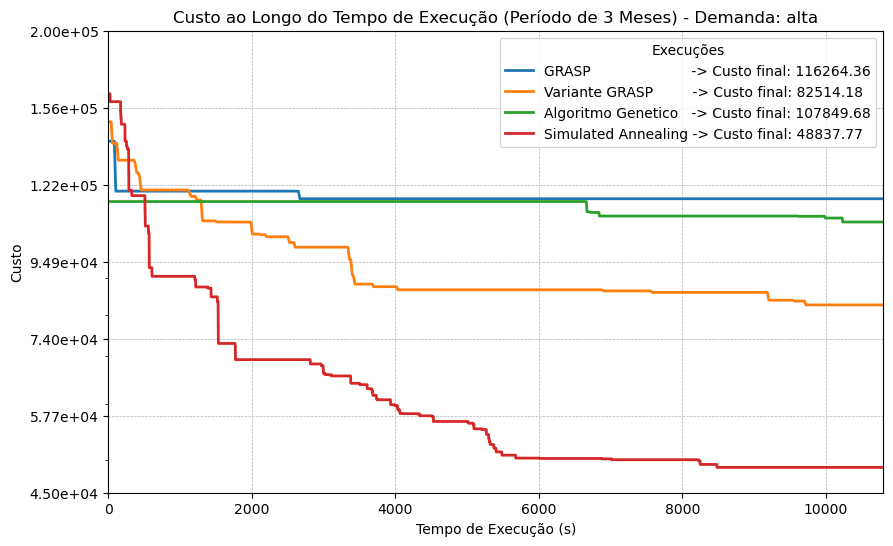

In [76]:
from matplotlib.ticker import NullFormatter


instances = ["GRASP", "GRASP-VARIANT", "Genetic Algorithm", "Simulated Annealing"]
i = 0

# Plota todos os históricos no mesmo gráfico
plt.figure(figsize=(10, 6))

# Algoritmos disponíveis e suas instâncias
tam = ["muito baixa", "baixa", "média", "alta"]
d_i = 3

# Rótulos para a legenda na ordem desejada
labels = [
    f"GRASP                       -> Custo final: {loaded_data[instances[0]]['best_cost_hist'][0][d_i]:.2f}", 
    f"Variante GRASP         -> Custo final: {loaded_data[instances[1]]['best_cost_hist'][0][d_i]:.2f}", 
    f"Algoritmo Genetico   -> Custo final: {loaded_data[instances[2]]['best_cost_hist'][0][d_i]:.2f}", 
    f"Simulated Annealing -> Custo final: {loaded_data[instances[3]]['best_cost_hist'][0][d_i]:.2f}", 
]

# Gera o gráfico com eixo X baseado no tempo de execução
for i in range(4):
    inst = loaded_data[instances[i]]
    # Calcula o tempo cumulativo baseado no tempo total e no número de iterações
    time_per_iteration = inst["elapsed_time_hist"][0][d_i] / len(inst["cost_histories"][0][d_i])
    time_cumulative = np.arange(0, inst["elapsed_time_hist"][0][d_i], time_per_iteration)[:len(inst["cost_histories"][0][d_i])]
    
    # Plota os dados
    plt.plot(time_cumulative, inst["cost_histories"][0][d_i], label=labels[i], linewidth=2)

plt.yscale('log')
plt.title(f"Custo ao Longo do Tempo de Execução (Período de 3 Meses) - Demanda: {tam[d_i]}")
plt.xlabel("Tempo de Execução (s)")
plt.ylabel("Custo")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajusta os valores do eixo X (tempo) e Y (custo)
plt.xlim(0, 10800)  # Define o limite do eixo X entre 0 e 3600 segundos
y_max = 200000
y_min = 45000
plt.ylim(y_min, y_max)

yticks = np.logspace(np.log10(y_min), np.log10(y_max), num=7)
plt.yticks(ticks=yticks, labels=[f"{val:.2e}" for val in yticks])  # Formata os valores como notação científica

# Remove marcações menores automáticas no eixo Y
plt.gca().yaxis.set_minor_formatter(NullFormatter())  # Remove marcas menores
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2e}" if x in yticks else ""))  # Apenas valores de yticks


# Exibe a legenda com alinhamento à esquerda
plt.legend(title="Execuções", loc='upper right')
plt.show()
